# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy some shares.
       If it falls further, buy some more, etc...
    3. If the SPY closes at a X-day high, sell your entire long position.
    
    (Scaling in)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
max_positions = 2

Run Strategy

In [6]:
s = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=max_positions)
s.run()

Retrieve log DataFrames

In [7]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [8]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total
142,2019-02-07,22.03,2019-02-19,23.14,1.11,436.23,393,7909.76
143,2019-02-27,22.35,2019-03-08,22.37,0.02,8.00,400,7917.76
144,2019-02-27,22.35,2019-03-12,22.68,0.33,132.33,401,8050.09
145,2019-03-18,22.05,2019-03-22,22.78,0.73,298.57,409,8348.66
146,2019-03-18,22.05,2019-03-25,23.26,1.21,494.89,409,8843.55
147,2019-03-28,22.41,2019-04-08,22.69,0.28,117.60,420,8961.15
148,2019-03-28,22.41,2019-04-09,22.82,0.41,172.20,420,9133.35
149,2019-04-12,22.21,2019-05-13,20.93,-1.28,-550.40,430,8582.95
150,2019-04-12,22.21,2019-05-30,20.77,-1.44,-620.64,431,7962.31
151,2019-07-01,24.58,2019-07-03,25.65,1.07,781.10,730,8743.41


In [9]:
dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2019-06-27,17962.31,17962.31,17962.31,0,17962.31,-
2019-06-28,17962.31,17962.31,17962.31,0,17962.31,-
2019-07-01,18261.61,17925.81,17962.31,730,18.91,O
2019-07-02,18743.41,18130.21,18670.41,730,18.91,-
2019-07-03,18743.41,18743.41,18743.41,0,18743.41,X


Generate strategy stats - display all available stats

In [10]:
pf.print_full(stats)

start                                                   2007-03-08
end                                                     2019-07-03
beginning_balance                                            10000
ending_balance                                            18743.41
total_net_profit                                           8743.41
gross_profit                                              28965.04
gross_loss                                               -20221.63
profit_factor                                                 1.43
return_on_initial_capital                                    87.43
annual_return_rate                                            5.23
trading_period                           12 years 3 months 25 days
pct_time_in_market                                           27.36
total_num_trades                                               152
trades_per_year                                              12.34
num_winning_trades                                            

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [11]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2007-03-08 00:00:00 BUY  260 GDX @ 38.35
2019-07-03 00:00:00 SELL 260 GDX @ 25.65


Plot Equity Curves: Strategy vs Benchmark

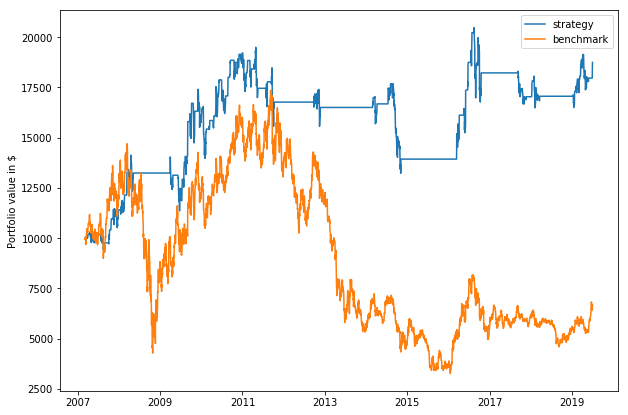

In [12]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

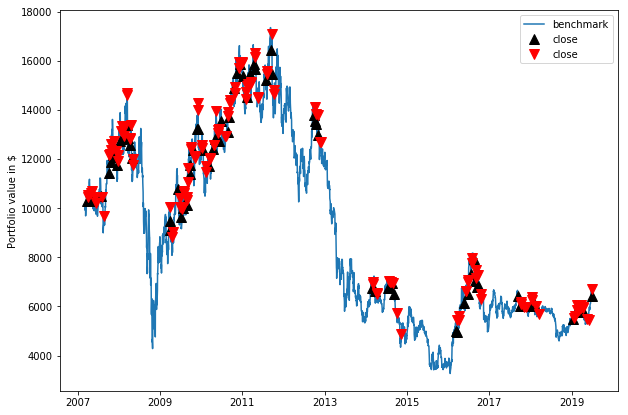

In [13]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,5.23,-3.20
max_closed_out_drawdown,-32.14,-81.15
drawdown_annualized_return,-6.14,25.35
drawdown_recovery,-3.52,-4.36
best_month,22.97,67.61
worst_month,-17.70,-52.01
sharpe_ratio,0.38,0.13
sortino_ratio,0.30,0.20
monthly_std,3.96,10.77


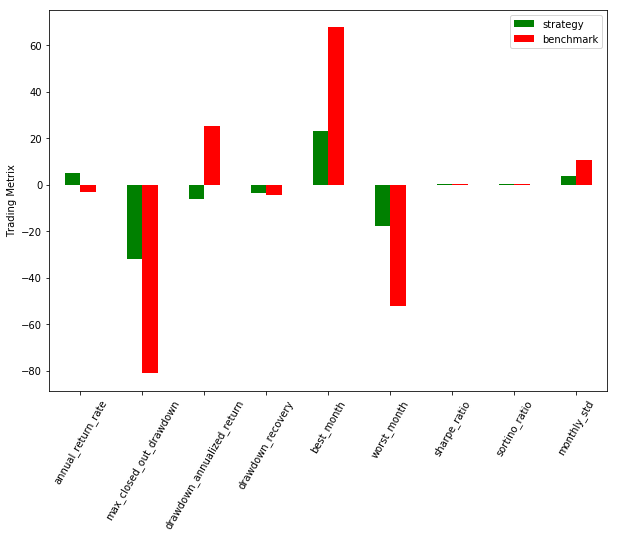

In [14]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(stats, benchmark.stats, *metrics)
df